# Speech Emotion Recognizer

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
from keras.utils import to_categorical 
import librosa.display
from IPython.display import Audio
import warnings
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
warnings.filterwarnings('ignore')

C:\Users\user\AppData\Local\Temp\ipykernel_8676\1375682891.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Load the Dataset

In [2]:
paths = []
labels = []
total_files = 0  # Track the total number of files processed

for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        total_files += 1 
print(f"Dataset is Loaded. Total files processed: {total_files}")

Dataset is Loaded. Total files processed: 4567


In [3]:
len(paths)

4567

In [4]:
paths[:5]

['./kaggle/input\\Dataset\\angry\\01_angry.wav',
 './kaggle/input\\Dataset\\angry\\02_angry.wav',
 './kaggle/input\\Dataset\\angry\\03_angry.wav',
 './kaggle/input\\Dataset\\angry\\04_angry.wav',
 './kaggle/input\\Dataset\\angry\\05_angry.wav']

In [5]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [6]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

speech  label
0  ./kaggle/input\Dataset\angry\01_angry.wav  angry
1  ./kaggle/input\Dataset\angry\02_angry.wav  angry
2  ./kaggle/input\Dataset\angry\03_angry.wav  angry
3  ./kaggle/input\Dataset\angry\04_angry.wav  angry
4  ./kaggle/input\Dataset\angry\05_angry.wav  angry

In [7]:
df['label'].value_counts()

label
angry      653
fear       653
neutral    653
disgust    652
happy      652
ps         652
sad        652
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

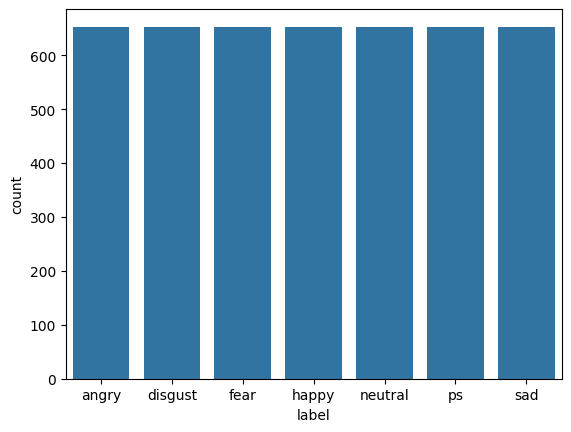

In [8]:
sns.countplot(data=df, x='label')

In [9]:
import matplotlib.pyplot as plt
import librosa.display

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr, color='black')  # Set color explicitly
    plt.show()

    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

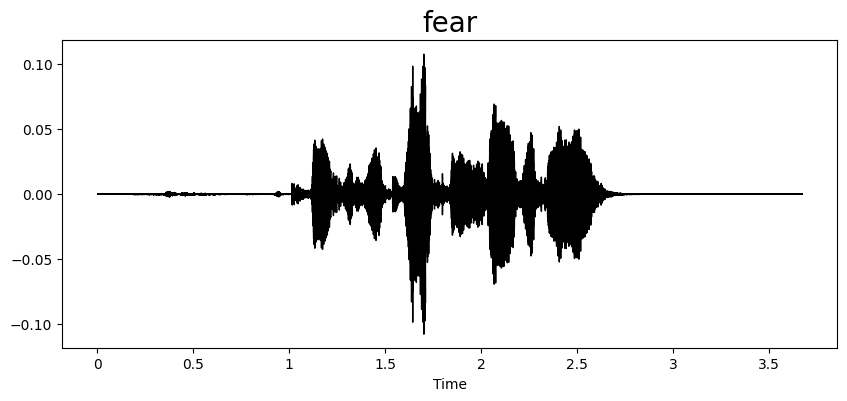

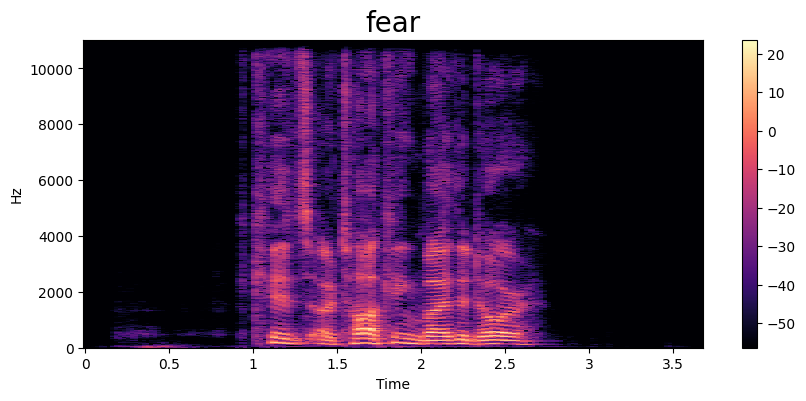

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

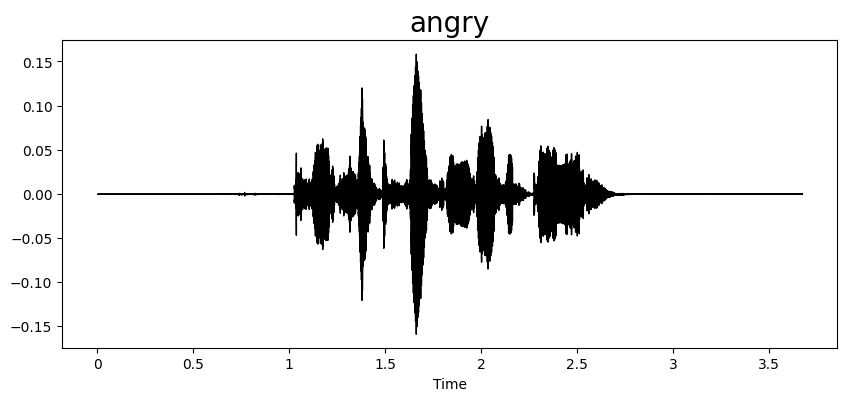

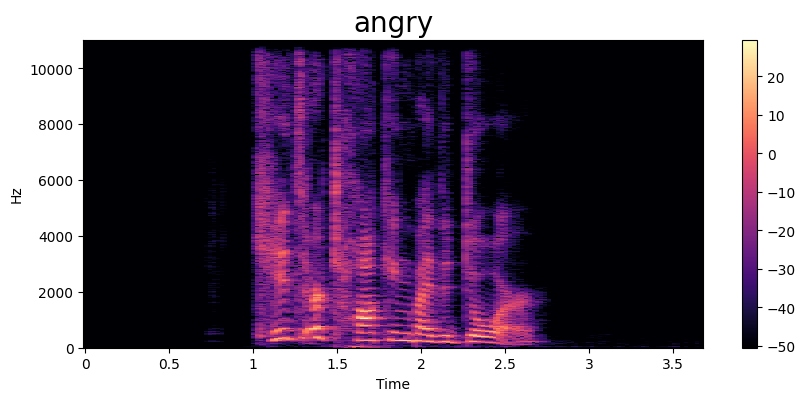

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

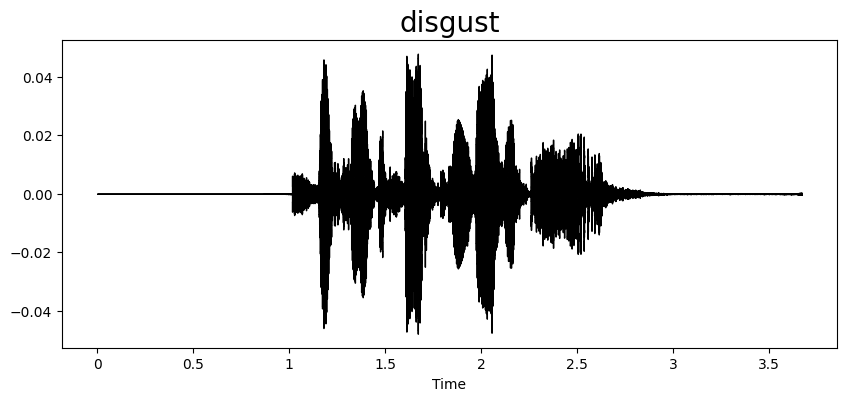

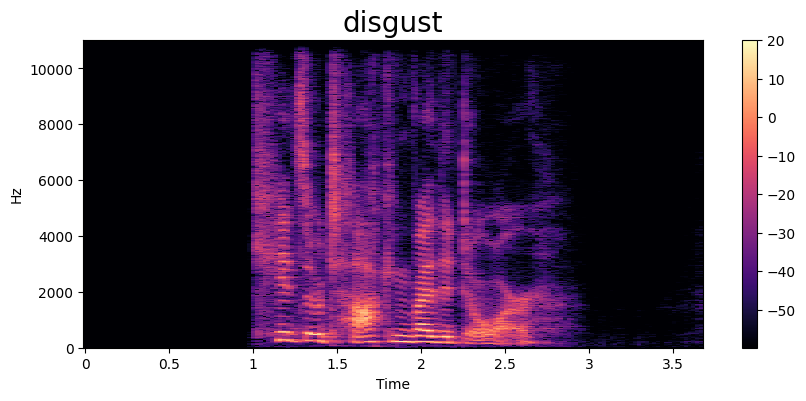

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

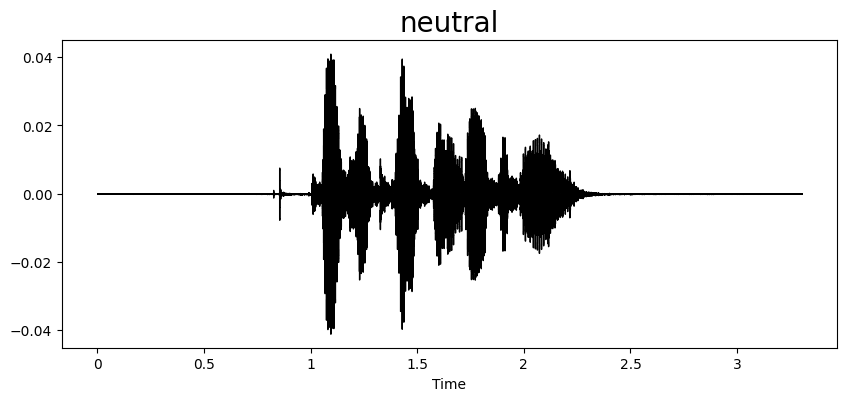

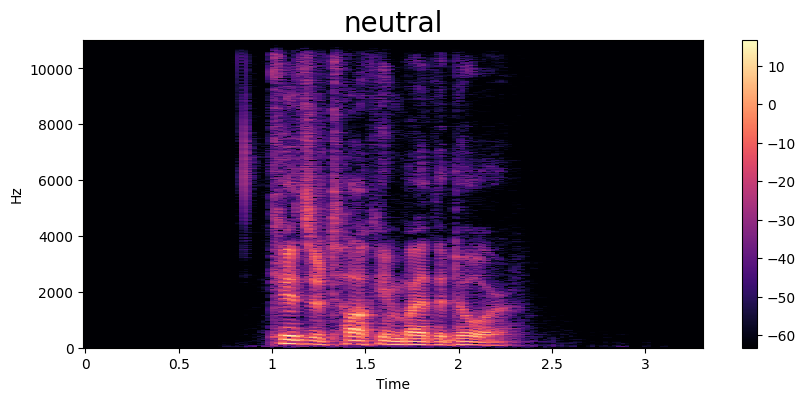

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

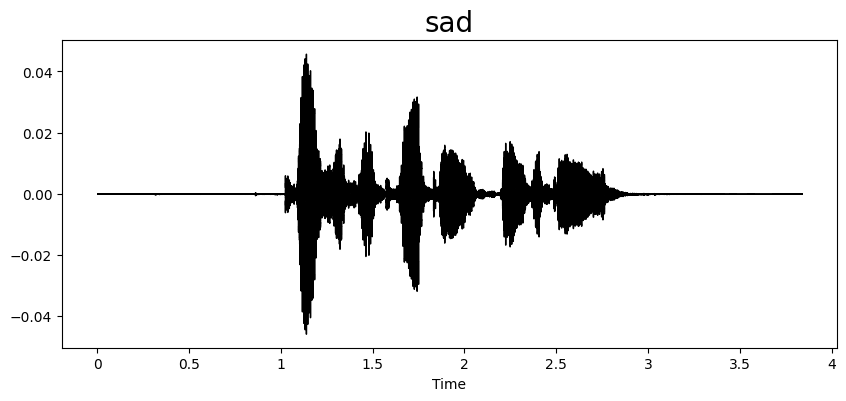

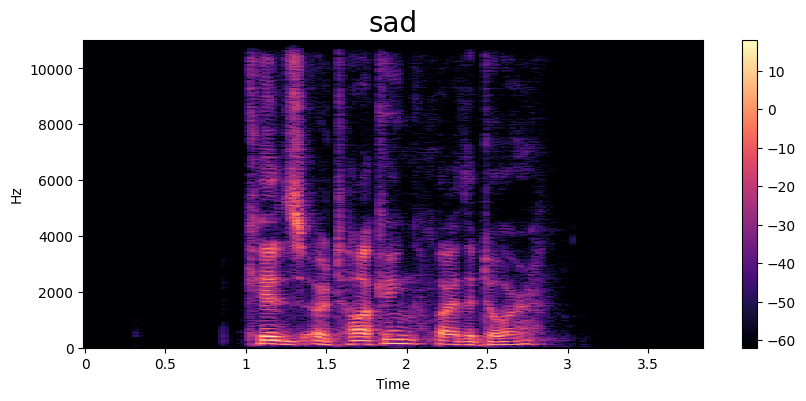

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

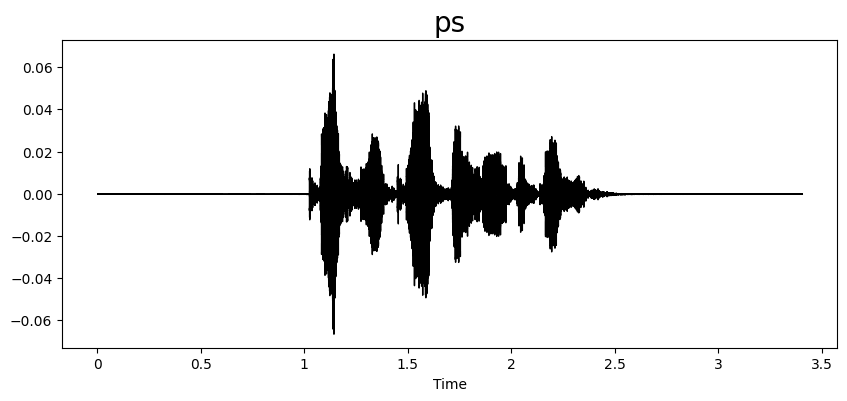

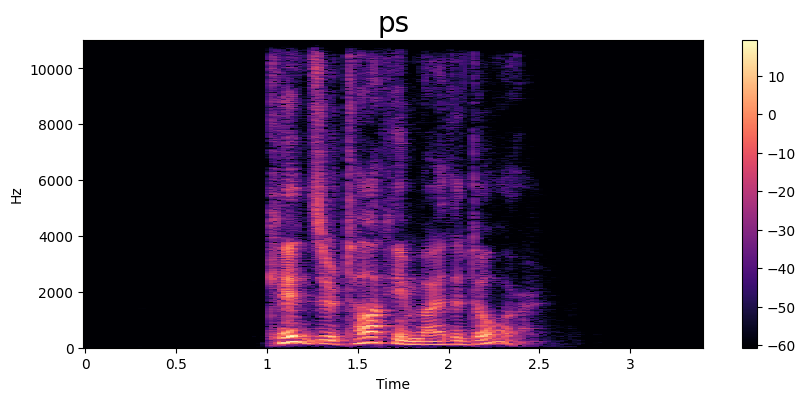

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

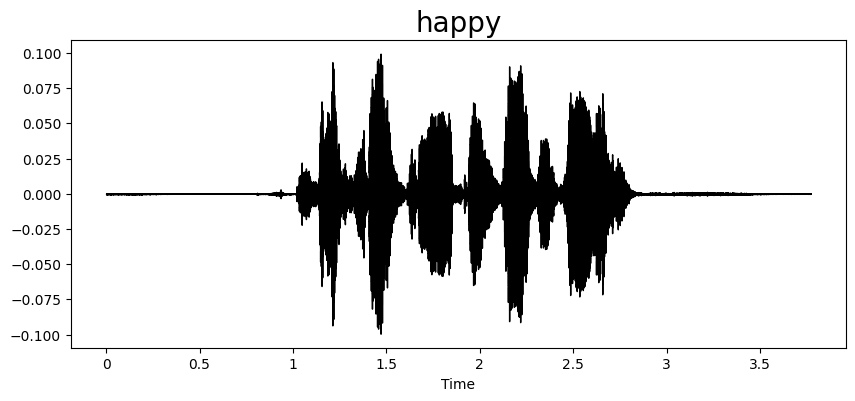

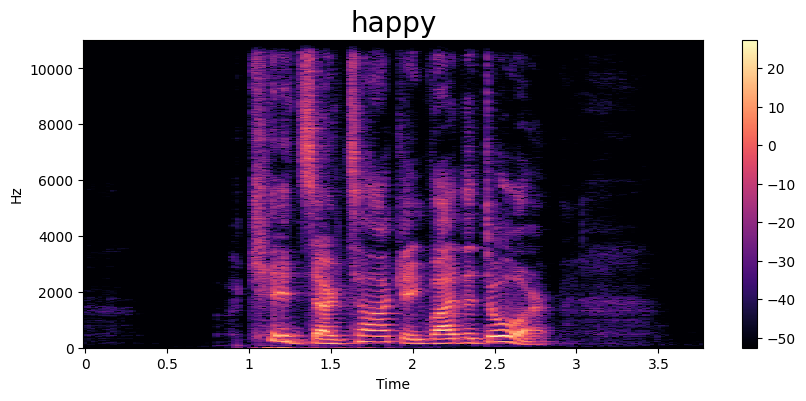

In [16]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[2]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-4.9088266e+02,  5.4259251e+01, -7.4870563e+00,  1.5928641e+01,
       -1.8539724e+00, -3.7620168e+00, -5.5671897e+00, -1.9980389e+00,
       -1.5838935e+01, -6.1874022e+00, -1.1881503e+00, -6.1189361e+00,
       -9.4793457e-01, -5.9448061e+00, -4.2698441e+00, -2.3766723e+00,
       -7.8854313e+00, -2.5771987e+00, -5.1138072e+00, -4.3479919e+00,
       -6.7218223e+00, -3.2926986e+00, -5.5671992e+00, -5.2388186e+00,
       -4.3417621e+00, -1.6398294e+00, -6.2198868e+00,  1.5936170e+00,
       -2.9304256e+00, -1.0795166e+00,  2.8551865e-02, -5.6054556e-01,
       -2.7654803e+00, -2.2101164e+00, -3.2277918e+00, -3.0124517e-02,
       -1.7449634e+00, -4.7193128e-01, -4.5563011e+00, -1.5693076e+00],
      dtype=float32)

In [19]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [20]:
X_mfcc

0       [-490.88266, 54.25925, -7.4870563, 15.928641, ...
1       [-526.7639, 52.98029, -13.038193, 7.258232, -7...
2       [-554.532, 75.44737, 2.6228595, 20.056547, 4.7...
3       [-521.82367, 42.11239, -13.007957, 4.1676183, ...
4       [-471.8216, 73.18985, -17.26226, 8.15322, 6.64...
                              ...                        
4562    [-406.48053, 80.379875, 32.462395, 46.579094, ...
4563    [-426.90918, 102.54756, 24.800041, 43.048096, ...
4564    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
4565    [-434.8618, 89.90637, 28.373262, 39.577065, -2...
4566    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 4567, dtype: object

In [21]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(4567, 40)

In [22]:
## input split
X = np.expand_dims(X, -1)
X.shape

(4567, 40, 1)

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [24]:
y = y.toarray()

In [25]:
y.shape

(4567, 7)

## Create the LSTM Model

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')  # Change the number of units to 7
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Split the data into training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the target labels
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()

# Print the shapes of the arrays
print("Shapes after one-hot encoding:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("y shape:", y.shape)



Shapes after one-hot encoding:
X_train shape: (2739, 40, 1)
y_train shape: (2739, 7)
X_val shape: (914, 40, 1)
y_val shape: (914, 7)
y shape: (4567, 7)


In [28]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=512, shuffle=True)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 404ms/step - accuracy: 0.1667 - loss: 1.9290 - val_accuracy: 0.2877 - val_loss: 1.8331
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 320ms/step - accuracy: 0.2788 - loss: 1.8250 - val_accuracy: 0.3862 - val_loss: 1.7276
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - accuracy: 0.3395 - loss: 1.7277 - val_accuracy: 0.4409 - val_loss: 1.5965
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 344ms/step - accuracy: 0.4024 - loss: 1.6092 - val_accuracy: 0.4573 - val_loss: 1.4351
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - accuracy: 0.4438 - loss: 1.4755 - val_accuracy: 0.5098 - val_loss: 1.3077
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - accuracy: 0.4935 - loss: 1.3597 - val_accuracy: 0.5481 - val_loss: 1.2262
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.5245 - loss: 1.2926 - val_accuracy: 0.5733 - val_loss: 1.1792
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.5647 - loss: 1.2299 - val_accuracy: 0.5744 - 

In [29]:
# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8160 - loss: 0.7743
Test Loss: 0.7908617258071899
Test Accuracy: 0.8096280097961426


In [30]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

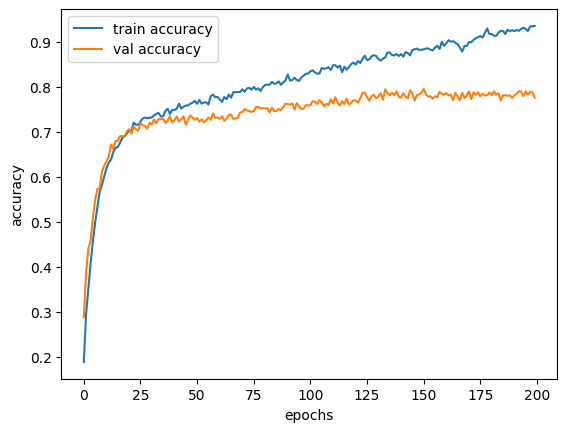

In [31]:
epochs = list(range(200))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

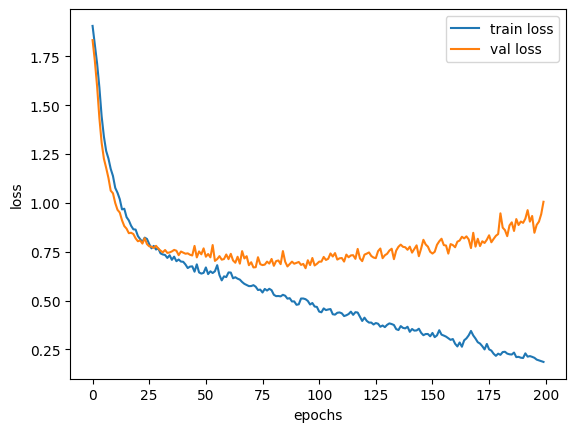

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


<Figure size 800x800 with 0 Axes>

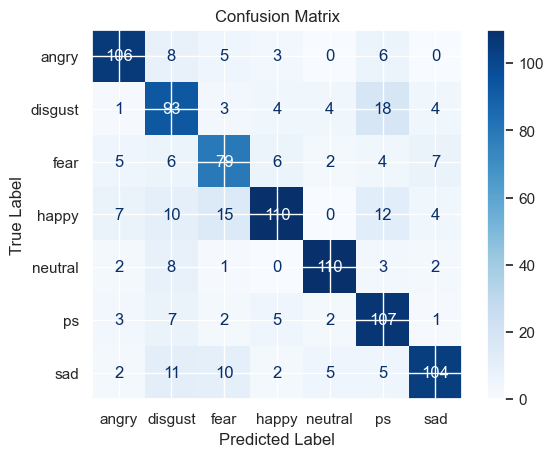

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert the one-hot encoded labels of the validation data back to categorical labels
y_true = np.argmax(y_val, axis=1)

# Compute the predictions of the model on the validation data
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Determine the number of unique labels in your dataset
class_labels = df['label'].unique()

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.set(font_scale=1)  
ConfusionMatrixDisplay(cm, display_labels=class_labels).plot(values_format='.4g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [34]:
# Save the trained model as an .h5 file
model.save('trained_model.h5')

print("Model saved as trained_model.h5")

Model saved as trained_model.h5
